In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

## KDE plot of the mean pressure by Label

In [36]:
def kde_plot(data, task_num, output_folder):
    # Normalize pressure between 0 and 1
    data['Pressure'] = (data['Pressure'] - data['Pressure'].min()) / (data['Pressure'].max() - data['Pressure'].min())
    # mean_values = data.groupby('Label')['Pressure'].mean().reset_index()
    # 
    # print(f"Mean values: \n {mean_values}")
    # print(f"data: \n {data}")
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x='Pressure', hue='Label', fill=True, palette="muted") # palette="coolwarm", "muted", "viridis", "rocket"
    plt.title(f'KDE of Pressure of the subjects - Task {task_num}')
    plt.xlabel('Normalized Pressure')
    plt.ylabel('Density')
    
    output_plot_kde = os.path.join(output_folder, 'KDE_plots')    
    os.makedirs(output_plot_kde, exist_ok=True)
    
    # save the plot
    plt.savefig(os.path.join(output_plot_kde, f'Kde_pressure_mean_Task_{task_num}.png'))
    plt.savefig(os.path.join(output_plot_kde, f'Kde_pressure_mean_Task_{task_num}.svg'))

# Bar plot of the mean time InAir and OnPaper

In [43]:
def bar_plot(data, task_num, output_folder):
    data['Status'] = data['Pressure'].apply(lambda x: 'On-paper' if x != 0 else 'In-air')
    # Calculate the mean time spent in-air and on-paper for each label
    mean_times = df.groupby(['Label', 'Status'])['Time'].mean().reset_index()
    
    # Pivot the table for easier plotting
    mean_times_pivot = mean_times.pivot(index='Label', columns='Status', values='Time').reset_index()
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=mean_times, x='Label', y='Time', hue='Status', palette='muted')
    plt.title(f'Mean Time Spent In-air vs On-paper by Class for Task {task_num}')
    plt.xlabel('Label')
    plt.ylabel('Mean Time [s]')
    plt.xticks(rotation=0) 
    
    output_barplot = os.path.join(output_folder, 'Barplot')    
    os.makedirs(output_barplot, exist_ok=True)
    
    # save the plot
    plt.savefig(os.path.join(output_barplot, f'BarPlot_InAirOnPaper_mean_time_Task_{task_num}.png'))
    plt.savefig(os.path.join(output_barplot, f'BarPlot_InAirOnPaper_mean_time_Task_{task_num}.svg'))
    
    plt.tight_layout()

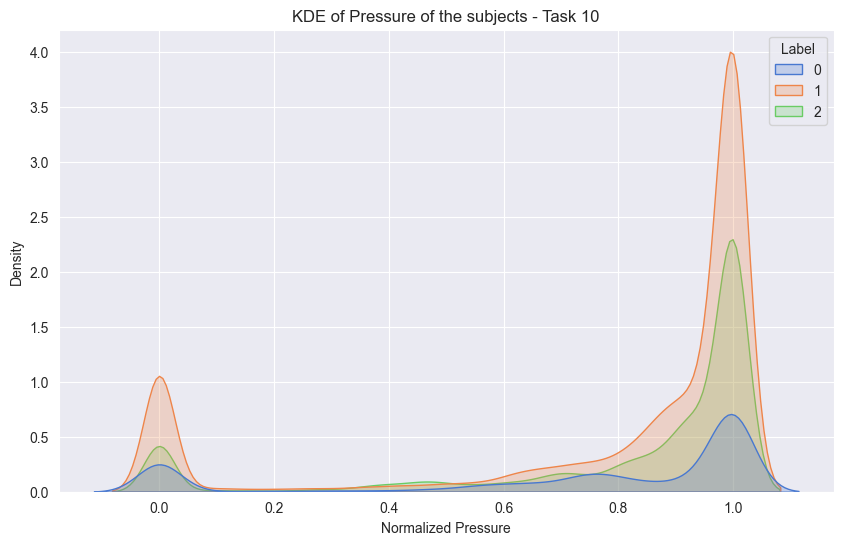

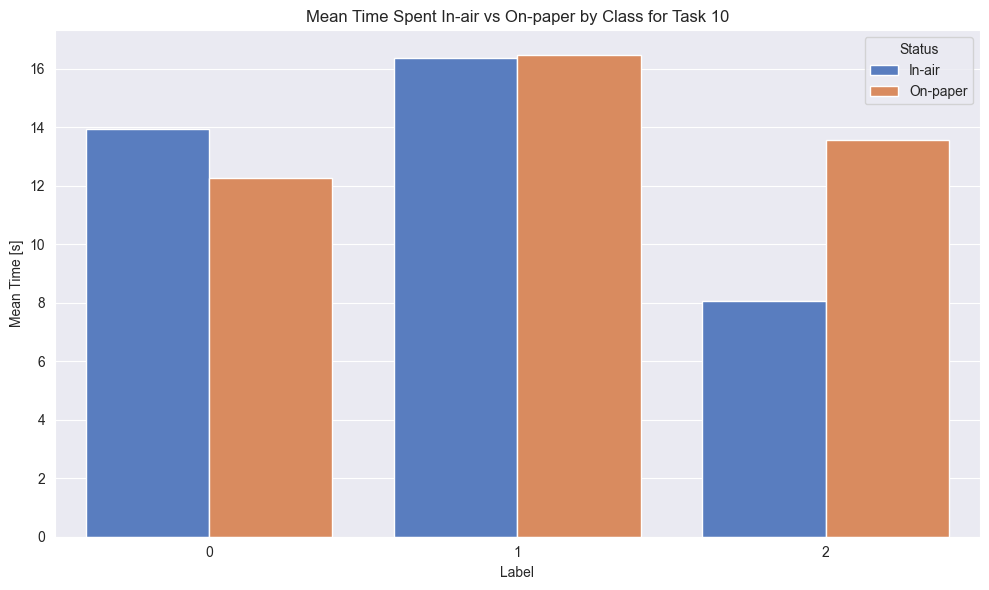

In [44]:
task_list = [10,11,12,13,21] # [10,11,12,13,21]

for task in task_list:
    path = r'C:\Users\Emanuele\Documents\Progetti Python\pyHEXtraction\Output_csv_for_plots\Task_' + str(task)
    output_plot = r'C:\Users\Emanuele\Documents\Progetti Python\pyHEXtraction\Output_plots'
    files = os.listdir(path)
    files = [f for f in files if f.endswith('.csv')]
    
    # Example: From Subject_xx.csv -> xx
    files_sub = [f.split('_')[1].split('.')[0] for f in files]
    files_subject = [int(f) for f in files_sub]
    files = [x for _, x in sorted(zip(files_subject, files))]
    
    df = pd.DataFrame()
    
    for file in files:
        df_temp = pd.read_csv(os.path.join(path, file))
        df = pd.concat([df, df_temp])
    
    kde_plot(df, task, output_plot)
    bar_plot(df, task, output_plot)